In [98]:
# eda for grocery sales forecasting 
import pandas as pd
import seaborn as sns 
import numpy as np 
import datetime
import os 
from matplotlib import pyplot as plt
import random


Exploratory Data Analysis

In [3]:
# test dataset
# ints can be replaced to smaller byte size to optimize performance
# use sample to build model and then replace with full size. 

test = pd.read_csv("/Volumes/HD David/COSC490/favorita-grocery-sales-forecasting/test.csv",parse_dates=['date'])
# train_sample = pd.read_csv("/Volumes/HD David/COSC490/favorita-grocery-sales-forecasting/train.csv",nrows=6000000 ,parse_dates=['date'])
transactions = pd.read_csv("/Volumes/HD David/COSC490/favorita-grocery-sales-forecasting/transactions.csv",parse_dates=['date'])
train_large  = pd.read_csv("/Volumes/HD David/COSC490/favorita-grocery-sales-forecasting/train.csv",parse_dates=['date'])


/Users/davidpinosproano/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [65]:
print("Shape of train:" , train_large.shape)
print("Shape of test:" , test.shape)
print("Shape of transactions:" , transactions.shape)


Shape of train: (125497040, 6)
Shape of test: (3370464, 5)
Shape of transactions: (83488, 3)


In [66]:
print("Shape of train:" , train_large.dtypes)
print("Shape of test:" , test.dtypes)
print("Shape of transactions:" , transactions.dtypes)

# datatypes are not the same for onpromotion train, test

Shape of train: id                      int64
date           datetime64[ns]
store_nbr               int64
item_nbr                int64
unit_sales            float64
onpromotion            object
dtype: object
Shape of test: id                      int64
date           datetime64[ns]
store_nbr               int64
item_nbr                int64
onpromotion              bool
dtype: object
Shape of transactions: date            datetime64[ns]
store_nbr                int64
transactions             int64
dtype: object


In [55]:
test.head(5)

,id,date,store_nbr,item_nbr,onpromotion
0,125497040,2017-08-16,1,96995,False
1,125497041,2017-08-16,1,99197,False
2,125497042,2017-08-16,1,103501,False
3,125497043,2017-08-16,1,103520,False
4,125497044,2017-08-16,1,103665,False


In [67]:
train_large.head(5)

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


In [57]:
transactions.head(5)

# join train and transactions on  store_nbr and date 

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [76]:
# Test 

train_large['onpromotion'].value_counts()

False    96028767
True      7810622
Name: onpromotion, dtype: int64

Transactions 

In [12]:
# Transactions 

tran_eda = transactions.groupby(['date']).agg({"store_nbr":"count", "transactions":np.sum}).reset_index()
tran_eda['transactions'].mean()

84113.5225921522

<AxesSubplot:xlabel='date', ylabel='transactions'>

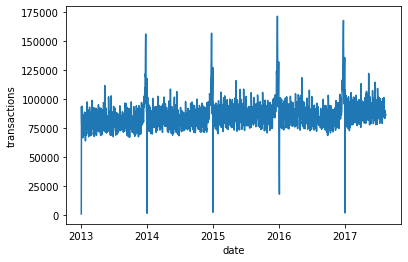

In [10]:
sns.lineplot(data= tran_eda,x = "date", y = "transactions")


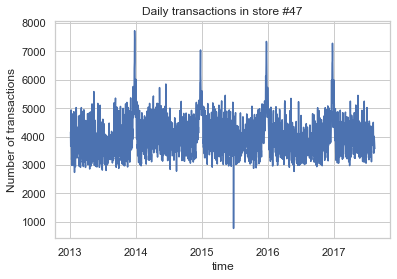

In [112]:
ts=transactions.loc[transactions['store_nbr']==47,['date','transactions']].set_index('date')
ts=ts.transactions.astype('float')

plt.title('Daily transactions in store #47')
plt.xlabel('time')
plt.ylabel('Number of transactions')
plt.plot(ts);

# spikes in sales in december due to christmas bonus

In [24]:
# top 10 days with highest transactions
# all december 24
tran_eda.sort_values(by = "transactions",ascending = False).head(10).reset_index(drop=True)




,date,store_nbr,transactions
0,2015-12-24,53,171169
1,2016-12-24,53,167542
2,2016-12-23,53,156932
3,2014-12-24,48,156546
4,2013-12-24,47,155846
5,2015-12-23,53,153338
6,2013-12-23,47,145876
7,2014-12-23,48,144513
8,2015-12-22,53,138921
9,2016-12-22,53,138892


Test 

In [21]:
test['onpromotion'] = test['onpromotion'].fillna(0)
test['onpromotion'] = test['onpromotion'].astype(int)


Train 

In [22]:
# take sample using seed 
random.seed(100)
sample1 = train_large.sample(n=1000000)
sample1 = sample1.reset_index(drop =True)

In [24]:
# percent of NaNs in sample 
1- (sample1.onpromotion.value_counts().sum() / len(sample1) ) 
# 0.17

# setting the onpromotion to int Replacing nans with 0  
sample1['onpromotion'] = sample1['onpromotion'].fillna(0)
sample1['onpromotion'] = sample1['onpromotion'].astype(int)



0    937887
1     62113
Name: onpromotion, dtype: int64

In [55]:
sample1

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,34638778,2014-11-06,26,570917,1.000,0
1,120422724,2017-06-28,47,2026597,5.000,0
2,6082370,2013-05-26,4,1057033,11.000,0
3,116878549,2017-05-26,25,2035587,5.000,0
4,44878329,2015-04-15,48,584188,3.036,0
...,...,...,...,...,...,...
999995,57063377,2015-09-20,17,1463507,18.000,0
999996,7576291,2013-06-28,28,1121513,5.000,0
999997,61299479,2015-11-06,4,1463611,1.000,0
999998,80025377,2016-05-23,27,802833,7.000,0


In [61]:
# sales per item 
# tran_eda = samples.groupby(['date']).agg({"store_nbr":"count", "transactions":np.sum}).reset_index()

expl = sample1.groupby(by = "date")['unit_sales'].sum().reset_index()
expl


,date,unit_sales
0,2013-01-01,7.000
1,2013-01-02,3791.265
2,2013-01-03,3027.095
3,2013-01-04,2670.186
4,2013-01-05,4188.608
...,...,...
1679,2017-08-11,6726.255
1680,2017-08-12,6961.057
1681,2017-08-13,6539.068
1682,2017-08-14,6065.454


<AxesSubplot:xlabel='date', ylabel='unit_sales'>

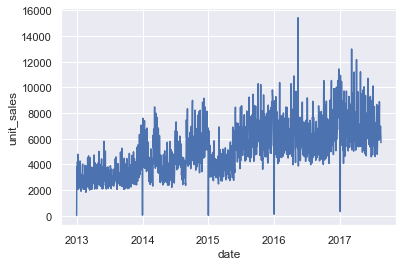

In [66]:
sns.set_theme(style="darkgrid")
sns.lineplot(x="date", y="unit_sales",data=expl)

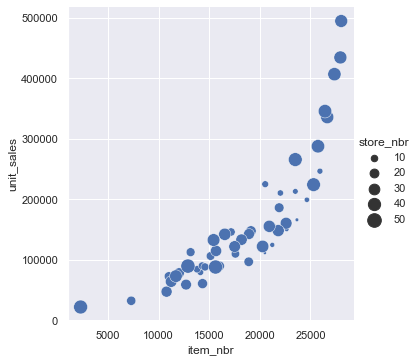

In [88]:
# group by store , get the amount of items and total unit sales 

planets = sample1.groupby(by = 'store_nbr').agg({"item_nbr":"count","unit_sales":"sum"})
sns.relplot(data=planets, x="item_nbr", y="unit_sales", size="store_nbr", sizes=(10, 200))


In [111]:
# take a look at start dates to see if we have to remove them 
# earthquake 


# violin plots 
# sns.set_theme(style="whitegrid")
# sns.violinplot(x="date", y="unit_sales",data=expl,
#                split=True, inner="quart", linewidth=1,
#                palette={"Yes": "b", "No": ".85"})
# sns.despine(left=True)

KeyError: 2013

Data Pipeline 


In [115]:
# train, transactions 
print(sample1.shape)
sample1.merge(transaction,how"left")






<bound method DataFrame.value_counts of                id       date  store_nbr  item_nbr  unit_sales  onpromotion
0        34638778 2014-11-06         26    570917       1.000            0
1       120422724 2017-06-28         47   2026597       5.000            0
2         6082370 2013-05-26          4   1057033      11.000            0
3       116878549 2017-05-26         25   2035587       5.000            0
4        44878329 2015-04-15         48    584188       3.036            0
...           ...        ...        ...       ...         ...          ...
999995   57063377 2015-09-20         17   1463507      18.000            0
999996    7576291 2013-06-28         28   1121513       5.000            0
999997   61299479 2015-11-06          4   1463611       1.000            0
999998   80025377 2016-05-23         27    802833       7.000            0
999999   75491327 2016-04-06         13    308085      21.000            0

[1000000 rows x 6 columns]>